## **Grupo: Santiago Mercado, Daniel Gutierrez, Jorge Peña**

# **Punto 1**
Se utilizó como problema de optimización el dado en clase:
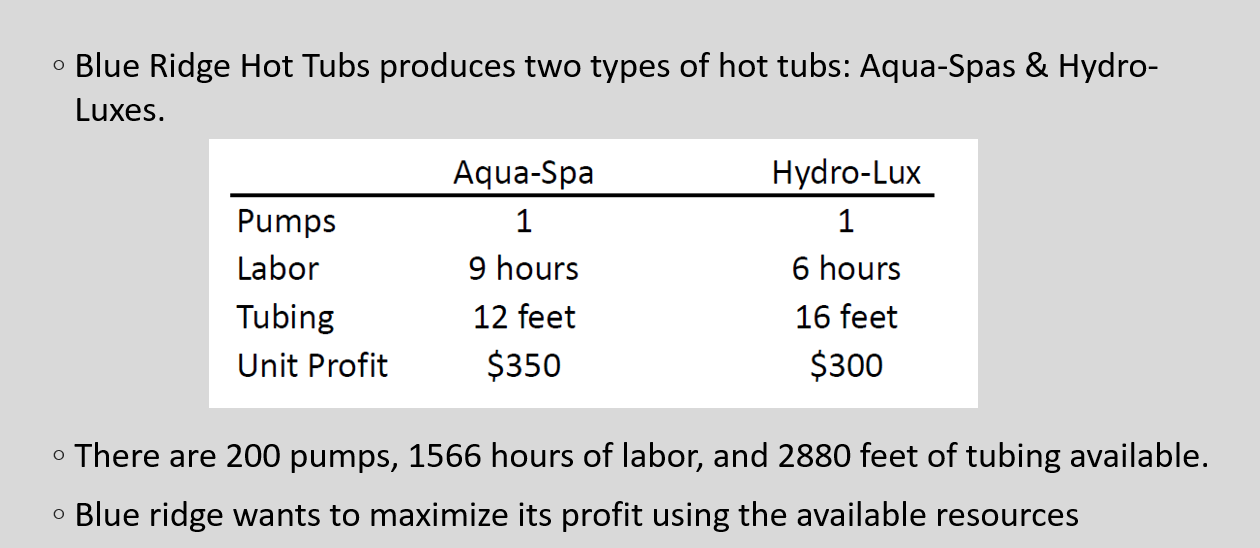

### Función objetivo:
Maximizar \( Z = 350X1 + 300X2 \)

donde:
-  X1  es el número de Aqua-Spas producidos.
-  X2  es el número de Hydro-Luxes producidos.

### Restricciones:
1. **Pumps**: \( X1 + X2 <= 200 \)
2. **Labor**: \( 9X1 + 6X2 <= 1566 \)
3. **Tubing**: \( 12X1 + 16X2 <= 2880 \)
4. **No negatividad**: \( X2 >= 0 \)
5. **No negatividad**: \( X2>= 0 \)


In [ ]:
from types import FunctionType
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Definir las restricciones como funciones de X2
def restriccion_1(X1, a1=1, b1=1, R1=200):
    return (R1 - a1*X1) / b1  # a1*X1 + b1*X2 <= R1

def restriccion_2(X1, a2=9, b2=6, R2=1566):
    return (R2 - a2*X1) / b2  # a2*X1 + b2*X2 <= R2

def restriccion_3(X1, a3=12, b3=16, R3=2880):
    return (R3 - a3*X1) / b3  # a3*X1 + b3*X2 <= R3

# Función para calcular el valor de la función objetivo
def calcular_funcion_objetivo(X1, X2):
    return 350 * X1 + 300 * X2

# Graficar la región factible y el punto seleccionado
def graficar_region_factible(X1, X2, a1, b1, R1, a2, b2, R2, a3, b3, R3):
    X1_vals = np.linspace(0, 200, 400)
    plt.figure(figsize=(8, 6))

    # Graficar cada restricción
    plt.plot(X1_vals, restriccion_1(X1_vals, a1, b1, R1), label=f'${a1}X_1 + {b1}X_2 \\leq {R1}$')
    plt.plot(X1_vals, restriccion_2(X1_vals, a2, b2, R2), label=f'${a2}X_1 + {b2}X_2 \\leq {R2}$')
    plt.plot(X1_vals, restriccion_3(X1_vals, a3, b3, R3), label=f'${a3}X_1 + {b3}X_2 \\leq {R3}$')

    # Sombrear la región factible
    plt.fill_between(X1_vals,
                     np.maximum(0, np.minimum(restriccion_1(X1_vals, a1, b1, R1),
                     np.minimum(restriccion_2(X1_vals, a2, b2, R2), restriccion_3(X1_vals, a3, b3, R3)))),
                     0, where=(X1_vals >= 0), color='gray', alpha=0.5)

    # Marcar el punto seleccionado (X1, X2)
    plt.scatter([X1], [X2], color='red', zorder=5)
    plt.text(X1 + 1, X2 + 1, f'({X1}, {X2})', fontsize=12, color='red')

    # Añadir etiquetas y límites
    plt.xlim((0, 200))
    plt.ylim((0, 200))
    plt.xlabel(r'$X_1$ (Número de Aqua-Spas)')
    plt.ylabel(r'$X_2$ (Número de Hydro-Luxes)')
    plt.axhline(0, color='black', lw=1)
    plt.axvline(0, color='black', lw=1)
    plt.legend(loc='upper right')
    plt.title('Región Factible para el Problema de Optimización')
    plt.grid(True)
    plt.show()

# Función que se ejecuta al presionar el botón de cálculo
def calcular_y_mostrar(X1, X2, a1, b1, R1, a2, b2, R2, a3, b3, R3):
    Z = calcular_funcion_objetivo(X1, X2)
    with output:
        clear_output(wait=True)
        print(f"Valor de la función objetivo en el punto ({X1}, {X2}): Z = {Z:.2f}")
        print(f"Restricción 1: {a1}X1 + {b1}X2 <= {R1}")
        print(f"Restricción 2: {a2}X1 + {b2}X2 <= {R2}")
        print(f"Restricción 3: {a3}X1 + {b3}X2 <= {R3}")
        graficar_region_factible(X1, X2, a1, b1, R1, a2, b2, R2, a3, b3, R3)

# Widgets de sliders para la interfaz
X1_slider = widgets.FloatSlider(value=50, min=0, max=200, step=1, description='X1:')
X2_slider = widgets.FloatSlider(value=75, min=0, max=200, step=1, description='X2:')

# Sliders para los coeficientes de las restricciones
a1_slider = widgets.FloatSlider(value=1, min=0.1, max=20, step=0.1, description='a1:')
b1_slider = widgets.FloatSlider(value=1, min=0.1, max=20, step=0.1, description='b1:')
R1_slider = widgets.FloatSlider(value=200, min=0, max=400, step=10, description='R1:')

a2_slider = widgets.FloatSlider(value=9, min=0.1, max=20, step=0.1, description='a2:')
b2_slider = widgets.FloatSlider(value=6, min=0.1, max=20, step=0.1, description='b2:')
R2_slider = widgets.FloatSlider(value=1566, min=0, max=3000, step=10, description='R2:')

a3_slider = widgets.FloatSlider(value=12, min=0.1, max=20, step=0.1, description='a3:')
b3_slider = widgets.FloatSlider(value=16, min=0.1, max=20, step=0.1, description='b3:')
R3_slider = widgets.FloatSlider(value=2880, min=0, max=5000, step=10, description='R3:')

calc_button = widgets.Button(description="Calcular y Graficar")
output = widgets.Output()

# Labels para mostrar las restricciones actuales
Func_label = widgets.Label(value=f"Función objetivo: Z = 350({X1_slider.value}) + 300({X2_slider.value})")
R1_label = widgets.Label(value=f"Restricción 1: {a1_slider.value}X1 + {b1_slider.value}X2 <= {R1_slider.value}")
R2_label = widgets.Label(value=f"Restricción 2: {a2_slider.value}X1 + {b2_slider.value}X2 <= {R2_slider.value}")
R3_label = widgets.Label(value=f"Restricción 3: {a3_slider.value}X1 + {b3_slider.value}X2 <= {R3_slider.value}")

# Actualizar labels dinámicamente
def actualizar_labels(*args):
    Func_label.value = f"Función objetivo: Z = 350({X1_slider.value}) + 300({X2_slider.value})"
    R1_label.value = f"Restricción 1: {a1_slider.value}X1 + {b1_slider.value}X2 <= {R1_slider.value}"
    R2_label.value = f"Restricción 2: {a2_slider.value}X1 + {b2_slider.value}X2 <= {R2_slider.value}"
    R3_label.value = f"Restricción 3: {a3_slider.value}X1 + {b3_slider.value}X2 <= {R3_slider.value}"

# Conectar el botón con la función de cálculo
calc_button.on_click(lambda b: calcular_y_mostrar(X1_slider.value, X2_slider.value,
                                                  a1_slider.value, b1_slider.value, R1_slider.value,
                                                  a2_slider.value, b2_slider.value, R2_slider.value,
                                                  a3_slider.value, b3_slider.value, R3_slider.value))

# Conectar los sliders con la función de actualización de labels
X1_slider.observe(actualizar_labels, 'value')
X2_slider.observe(actualizar_labels, 'value')

a1_slider.observe(actualizar_labels, 'value')
b1_slider.observe(actualizar_labels, 'value')
R1_slider.observe(actualizar_labels, 'value')

a2_slider.observe(actualizar_labels, 'value')
b2_slider.observe(actualizar_labels, 'value')
R2_slider.observe(actualizar_labels, 'value')

a3_slider.observe(actualizar_labels, 'value')
b3_slider.observe(actualizar_labels, 'value')
R3_slider.observe(actualizar_labels, 'value')

# Mostrar los widgets en Colab
display(Func_label, X1_slider, X2_slider)
display(R1_label, a1_slider, b1_slider, R1_slider)
display(R2_label, a2_slider, b2_slider, R2_slider)
display(R3_label, a3_slider, b3_slider, R3_slider)
display(calc_button, output)

Label(value='Función objetivo: Z = 350(50.0) + 300(75.0)')

FloatSlider(value=50.0, description='X1:', max=200.0, step=1.0)

FloatSlider(value=75.0, description='X2:', max=200.0, step=1.0)

Label(value='Restricción 1: 1.0X1 + 1.0X2 <= 200.0')

FloatSlider(value=1.0, description='a1:', max=20.0, min=0.1)

FloatSlider(value=1.0, description='b1:', max=20.0, min=0.1)

FloatSlider(value=200.0, description='R1:', max=400.0, step=10.0)

Label(value='Restricción 2: 9.0X1 + 6.0X2 <= 1566.0')

FloatSlider(value=9.0, description='a2:', max=20.0, min=0.1)

FloatSlider(value=6.0, description='b2:', max=20.0, min=0.1)

FloatSlider(value=1566.0, description='R2:', max=3000.0, step=10.0)

Label(value='Restricción 3: 12.0X1 + 16.0X2 <= 2880.0')

FloatSlider(value=12.0, description='a3:', max=20.0, min=0.1)

FloatSlider(value=16.0, description='b3:', max=20.0, min=0.1)

FloatSlider(value=2880.0, description='R3:', max=5000.0, step=10.0)

Button(description='Calcular y Graficar', style=ButtonStyle())

Output()

## **Punto 2**

Para esta comparación utilizamos la representación COO para la matriz dispersa

In [ ]:
import numpy as np
from scipy.sparse import coo_matrix
import time

class SparseMatrixCOO:
    def __init__(self, rows, cols, data, shape):
        self.rows = np.array(rows)
        self.cols = np.array(cols)
        self.data = np.array(data)
        self.shape = shape

    def to_dense(self):
        dense = np.zeros(self.shape)
        for i in range(len(self.data)):
            dense[self.rows[i], self.cols[i]] = self.data[i]
        return dense

def create_random_sparse(shape, density=0.1):
    num_elements = int(shape[0] * shape[1] * density)
    rows = np.random.randint(0, shape[0], num_elements)
    cols = np.random.randint(0, shape[1], num_elements)
    data = np.random.randint(0, 1001, num_elements)  # Números enteros entre 0 y 1000
    return rows, cols, data, shape

def print_coo_representation(rows, cols, data, title):
    print(f"\n{title}")
    print("Filas (rows):", rows[:10], "..." if len(rows) > 10 else "")
    print("Columnas (cols):", cols[:10], "..." if len(cols) > 10 else "")
    print("Datos (data):", data[:10], "..." if len(data) > 10 else "")

def time_operation(func):
    start_time = time.time()
    func()
    return time.time() - start_time

# Crear una matriz dispersa aleatoria
shape = (50000, 50000)
rows, cols, data, _ = create_random_sparse(shape)


print("Información General:")
print(f"Tamaño de la matriz: {shape[0]}x{shape[1]}")
print(f"Número de elementos no cero: {len(data)}")
print(f"Densidad aproximada: {len(data) / (shape[0] * shape[1]) * 100:.4f}%")

our_time = time_operation(lambda: SparseMatrixCOO(rows, cols, data, shape))
scipy_time = time_operation(lambda: coo_matrix((data, (rows, cols)), shape=shape))

print("\nComparación de tiempos:")
print(f"Tiempo de nuestra implementación: {our_time:.6f} segundos")
print(f"Tiempo de la implementación de SciPy: {scipy_time:.6f} segundos")
print(f"Diferencia absoluta en tiempo: {abs(our_time - scipy_time):.6f} segundos")
print(f"Nuestra implementación es {abs(our_time - scipy_time) / min(our_time, scipy_time) * 100:.2f}% veces {'más lenta' if our_time > scipy_time else 'más rápida'} que SciPy")

Información General:
Tamaño de la matriz: 50000x50000
Número de elementos no cero: 250000000
Densidad aproximada: 10.0000%

Comparación de tiempos:
Tiempo de nuestra implementación: 15.593173 segundos
Tiempo de la implementación de SciPy: 2.841672 segundos
Diferencia absoluta en tiempo: 12.751501 segundos
Nuestra implementación es 448.73% veces más lenta que SciPy


# **Punto 3**

Selecciona la función para la expansión de Taylor:
1: sin(x)
2: cos(x)
3: exp(x)
4: log(x)
5: x^3 - 4x^2 + x + 6
Ingrese el número de la función (1-5): 5
Ingrese el número de términos de la expansión de Taylor: 100
Ingrese el punto de expansión a (por ejemplo, 0): 0


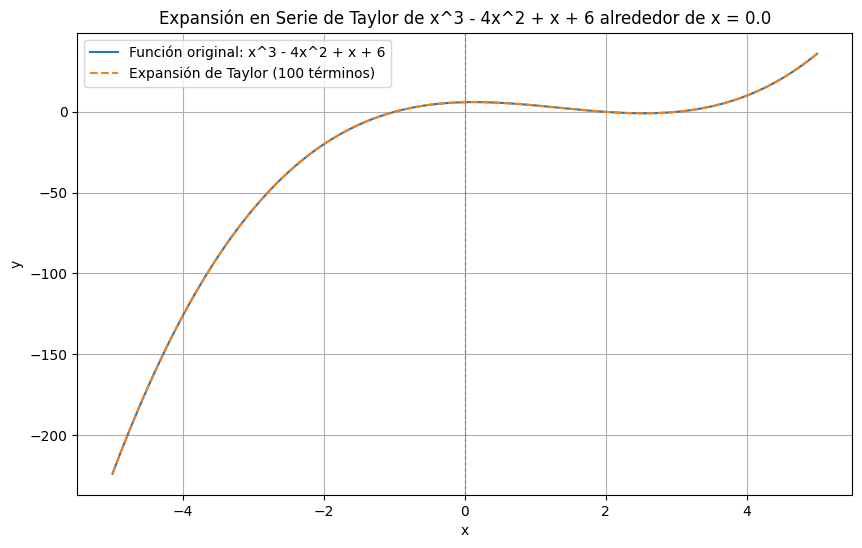

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Definir las funciones disponibles
def f_sin(x):
    return np.sin(x)

def f_cos(x):
    return np.cos(x)

def f_exp(x):
    return np.exp(x)

def f_log(x):
    # Manejar valores no válidos para log(x), como valores negativos o cero
    return np.where(x > 0, np.log(x), np.nan)

def f_polynomial(x):
    return x**3 - 4*x**2 + x + 6

# Lista de funciones y sus nombres
functions = {
    1: ('sin(x)', f_sin),
    2: ('cos(x)', f_cos),
    3: ('exp(x)', f_exp),
    4: ('log(x)', f_log),
    5: ('x^3 - 4x^2 + x + 6', f_polynomial)
}

# Obtener la entrada del usuario con manejo de errores
print("Selecciona la función para la expansión de Taylor:")
for key, value in functions.items():
    print(f"{key}: {value[0]}")

while True:
    try:
        function_choice = int(input("Ingrese el número de la función (1-5): "))
        if function_choice not in functions:
            raise ValueError
        break
    except ValueError:
        print("Selección inválida. Por favor, ingrese un número entre 1 y 5.")

func_name, func = functions[function_choice]

while True:
    try:
        n_terms = int(input("Ingrese el número de términos de la expansión de Taylor: "))
        if n_terms <= 0:
            raise ValueError
        break
    except ValueError:
        print("Entrada inválida. Por favor, ingrese un número entero positivo.")

while True:
    try:
        expansion_point = float(input("Ingrese el punto de expansión a (por ejemplo, 0): "))
        break
    except ValueError:
        print("Entrada inválida. Por favor, ingrese un número válido.")

# Definir la variable simbólica y la función simbólica
x = sp.Symbol('x')
function = {
    1: sp.sin(x),
    2: sp.cos(x),
    3: sp.exp(x),
    4: sp.log(x),
    5: x**3 - 4*x**2 + x + 6
}[function_choice]

# Calcular la serie de Taylor
taylor_series = function.series(x, expansion_point, n_terms).removeO()

# Convertir la serie de Taylor en una función de Python
taylor_func = sp.lambdify(x, taylor_series, "numpy")

# Definir el rango para la gráfica
x_vals = np.linspace(expansion_point - 5, expansion_point + 5, 400)
y_vals = func(x_vals)
y_taylor_vals = taylor_func(x_vals)

# Graficar la función original y su expansión en serie de Taylor
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label=f"Función original: {func_name}")
plt.plot(x_vals, y_taylor_vals, label=f"Expansión de Taylor ({n_terms} términos)", linestyle='--')
plt.axvline(expansion_point, color='gray', linestyle='--', linewidth=0.8)
plt.title(f"Expansión en Serie de Taylor de {func_name} alrededor de x = {expansion_point}")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()


## **Punto 4**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

#FUNCION OBJETIVO + GRADIENTE
def objective_function(x):
    return x[0]**2 + x[1]**2 + 3

def gradient_function(x):
    return np.array([2*x[0], 2*x[1]])


# DEFINICION DE PUNTOS INCIALES Y PARAMETROS
initial_points = [np.array([10, 10]), np.array([-10, 5]), np.array([1, 1])]
learning_rates = [0.01, 0.1, 0.5]

results = []

algorithms = ['CG', 'Newton-CG', 'BFGS']  # Conjugate Gradient, Newton's Method, BFGS

# EJECUTAR OPTIMIZACION PARA CADA COMBINACION DE ALGORITMO, PUNTO INICIAL Y TASA DE APRENDIZAJE
for algo in algorithms:
    for init_point in initial_points:
        for lr in learning_rates:
            if algo == 'CG':  # Gradiente Conjugado
                res = minimize(objective_function, init_point, method=algo, jac=gradient_function,
                               options={'disp': False, 'gtol': 1e-5, 'maxiter': 1000})
            elif algo == 'Newton-CG':  # Método de Newton
                res = minimize(objective_function, init_point, method=algo, jac=gradient_function,
                               options={'disp': False, 'xtol': 1e-5, 'maxiter': 1000})
            elif algo == 'BFGS':  # BFGS
                res = minimize(objective_function, init_point, method=algo, jac=gradient_function,
                               options={'disp': False, 'gtol': 1e-5, 'maxiter': 1000})


            results.append({
                'algoritmo': algo,
                'punto_inicial': init_point,
                'tasa_aprendizaje': lr,
                'resultado': res.fun,
                'iteraciones': res.nit,
                'exito': res.success
            })





In [ ]:
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

    algoritmo punto_inicial  tasa_aprendizaje  resultado  iteraciones  exito
0          CG      [10, 10]              0.01        3.0            1   True
1          CG      [10, 10]              0.10        3.0            1   True
2          CG      [10, 10]              0.50        3.0            1   True
3          CG      [-10, 5]              0.01        3.0            1   True
4          CG      [-10, 5]              0.10        3.0            1   True
5          CG      [-10, 5]              0.50        3.0            1   True
6          CG        [1, 1]              0.01        3.0            3   True
7          CG        [1, 1]              0.10        3.0            3   True
8          CG        [1, 1]              0.50        3.0            3   True
9   Newton-CG      [10, 10]              0.01        3.0            2   True
10  Newton-CG      [10, 10]              0.10        3.0            2   True
11  Newton-CG      [10, 10]              0.50        3.0            2   True

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# FUNCION OBJETIVO + GRADIENTE
def objective_function(x):
    return x[0]**2 + x[1]**2 + 3

def gradient_function(x):
    return np.array([2*x[0], 2*x[1]])

# NUEVA DEFINICION DE PUNTOS INCIALES Y PARAMETROS
initial_points = [np.array([20, 20]), np.array([-5, 15]), np.array([2, -2])]
learning_rates = [0.05, 0.2, 0.7]

results = []

algorithms = ['CG', 'Newton-CG', 'BFGS']  # Conjugate Gradient, Newton's Method, BFGS

# EJECUTAR OPTIMIZACION PARA CADA COMBINACION DE ALGORITMO, PUNTO INICIAL Y TASA DE APRENDIZAJE
for algo in algorithms:
    for init_point in initial_points:
        for lr in learning_rates:
            if algo == 'CG':  # Gradiente Conjugado
                res = minimize(objective_function, init_point, method=algo, jac=gradient_function,
                               options={'disp': False, 'gtol': 1e-6, 'maxiter': 500})
            elif algo == 'Newton-CG':  # Método de Newton
                res = minimize(objective_function, init_point, method=algo, jac=gradient_function,
                               options={'disp': False, 'xtol': 1e-6, 'maxiter': 500})
            elif algo == 'BFGS':  # BFGS
                res = minimize(objective_function, init_point, method=algo, jac=gradient_function,
                               options={'disp': False, 'gtol': 1e-6, 'maxiter': 500})

            results.append({
                'algoritmo': algo,
                'punto_inicial': init_point,
                'tasa_aprendizaje': lr,
                'resultado': res.fun,
                'iteraciones': res.nit,
                'exito': res.success
            })


In [ ]:
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

    algoritmo punto_inicial  tasa_aprendizaje  resultado  iteraciones  exito
0          CG      [20, 20]              0.05        3.0            3   True
1          CG      [20, 20]              0.20        3.0            3   True
2          CG      [20, 20]              0.70        3.0            3   True
3          CG      [-5, 15]              0.05        3.0            1   True
4          CG      [-5, 15]              0.20        3.0            1   True
5          CG      [-5, 15]              0.70        3.0            1   True
6          CG       [2, -2]              0.05        3.0            1   True
7          CG       [2, -2]              0.20        3.0            1   True
8          CG       [2, -2]              0.70        3.0            1   True
9   Newton-CG      [20, 20]              0.05        3.0            2   True
10  Newton-CG      [20, 20]              0.20        3.0            2   True
11  Newton-CG      [20, 20]              0.70        3.0            2   True

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# FUNCION OBJETIVO + GRADIENTE
def objective_function(x):
    return x[0]**2 + x[1]**2 + 3

def gradient_function(x):
    return np.array([2*x[0], 2*x[1]])

# NUEVA DEFINICION DE PUNTOS INCIALES Y PARAMETROS
initial_points = [np.array([15, -15]), np.array([-20, 10]), np.array([5, 5])]
learning_rates = [0.03, 0.15, 0.6]

results = []

algorithms = ['CG', 'Newton-CG', 'BFGS']  # Conjugate Gradient, Newton's Method, BFGS

# EJECUTAR OPTIMIZACION PARA CADA COMBINACION DE ALGORITMO, PUNTO INICIAL Y TASA DE APRENDIZAJE
for algo in algorithms:
    for init_point in initial_points:
        for lr in learning_rates:
            if algo == 'CG':  # Gradiente Conjugado
                res = minimize(objective_function, init_point, method=algo, jac=gradient_function,
                               options={'disp': False, 'gtol': 1e-7, 'maxiter': 700})
            elif algo == 'Newton-CG':  # Método de Newton
                res = minimize(objective_function, init_point, method=algo, jac=gradient_function,
                               options={'disp': False, 'xtol': 1e-7, 'maxiter': 700})
            elif algo == 'BFGS':  # BFGS
                res = minimize(objective_function, init_point, method=algo, jac=gradient_function,
                               options={'disp': False, 'gtol': 1e-7, 'maxiter': 700})

            results.append({
                'algoritmo': algo,
                'punto_inicial': init_point,
                'tasa_aprendizaje': lr,
                'resultado': res.fun,
                'iteraciones': res.nit,
                'exito': res.success
            })




In [ ]:
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

    algoritmo punto_inicial  tasa_aprendizaje  resultado  iteraciones  exito
0          CG     [15, -15]              0.03        3.0            3   True
1          CG     [15, -15]              0.15        3.0            3   True
2          CG     [15, -15]              0.60        3.0            3   True
3          CG     [-20, 10]              0.03        3.0            3   True
4          CG     [-20, 10]              0.15        3.0            3   True
5          CG     [-20, 10]              0.60        3.0            3   True
6          CG        [5, 5]              0.03        3.0            3   True
7          CG        [5, 5]              0.15        3.0            3   True
8          CG        [5, 5]              0.60        3.0            3   True
9   Newton-CG     [15, -15]              0.03        3.0            2   True
10  Newton-CG     [15, -15]              0.15        3.0            2   True
11  Newton-CG     [15, -15]              0.60        3.0            2   True

**CONCLUSIONES**

Para tener en cuenta:
- *Punto inicial*:
  - *Lejos del mínimo*: Puede aumentar la cantidad de iteraciones si el punto inicial está en una región plana del espacio de búsqueda.
  - *Cerca del mínimo*: Reduce la cantidad de iteraciones, ya que el algoritmo comienza más cerca de la solución.

  


¿Cómo afectan estos cambios los resultados?

Los cambios en los puntos iniciales, las tasas de aprendizaje, y los algoritmos de optimización parecen no afectar significativamente el resultado final de la función objetivo en este caso. Esto se debe a que la función objetivo es simple (una parábola cuadrática) y todos los algoritmos de optimización son capaces de encontrar el mínimo global correctamente. El valor del resultado es consistente en todos los casos, igual a 3.0, que es el valor mínimo de la función objetivo dada.


¿Cómo afecta el tiempo de convergencia o cantidad de iteraciones?

**Algoritmo CG (Gradiente Conjugado):** El número de iteraciones varía ligeramente entre 1 y 3 para diferentes puntos iniciales y tasas de aprendizaje. Sin embargo, se puede notar que la elección del punto inicial tiene un efecto mayor en la convergencia que la tasa de aprendizaje. Para puntos iniciales más cercanos al mínimo global (como [1, 1]), el algoritmo tiende a converger más rápidamente (menos iteraciones).

**Algoritmo Newton-CG (Método de Newton):** Similar al Gradiente Conjugado, el número de iteraciones varía entre 1 y 3. También aquí, los puntos iniciales más cercanos al mínimo parecen requerir menos iteraciones. En general, este método es más eficiente en términos de número de iteraciones comparado con el Gradiente Conjugado.

**Algoritmo BFGS:** Este algoritmo también muestra un comportamiento similar, con un número de iteraciones que varía entre 1 y 3. Como en los otros métodos, los puntos iniciales cercanos al mínimo tienden a converger en menos iteraciones.
